# Skaters (Season 2024/25) - Goals

## Step 0: Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from utils import df_utils, distributions_utils, pmf_utils, cdf_utils, modeling_distributions_utils

## Step 1: Import the dataset

In [6]:
skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

HTTPError: HTTP Error 403: Forbidden

## Step 2: Read the data

In [ ]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [26]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


## Step 3: Data cleaning

In [28]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


In [29]:
df = df_utils.drop_duplicate_columns(df, ["faceoffsWon", "I_F_faceOffsWon"])
df = df_utils.drop_duplicate_columns(df, [ "penalityMinutes", "I_F_penalityMinutes"])

Dropped columns: ['I_F_faceOffsWon']
Number of features: 153
Dropped columns: ['I_F_penalityMinutes']
Number of features: 152


## Step 4: Variables

In [30]:
feature="I_F_goals"
situation = "all"
min_games_played = 20
name_player="Auston Matthews"

## Step 5: Summary statistics and Frequency Tables

In [31]:
answer = df[df["situation"] == "all"].loc[lambda d: d[feature].idxmax()]
print(f"Top goal scorer: {answer["name"]} with {int(answer[feature])} goals.")

answer = df[df["situation"] == "5on4"].loc[lambda d: d['I_F_goals'].idxmax()]
print(f"Top goal scorer in 5-on-4 situations: {answer["name"]} with {int(answer[feature])} goals.")

answer = df[df["situation"] == "4on5"].loc[lambda d: d['I_F_goals'].idxmax()]
print(f"Top goal scorer in 4-on-5 situations: {answer["name"]} with {int(answer[feature])} goals.")

Top goal scorer: Leon Draisaitl with 52 goals.
Top goal scorer in 5-on-4 situations: Jake Guentzel with 15 goals.
Top goal scorer in 4-on-5 situations: Alex Tuch with 6 goals.


Mean: 8.58
Variance: 96.74
Standard deviation: 9.83
Mode: 0.0


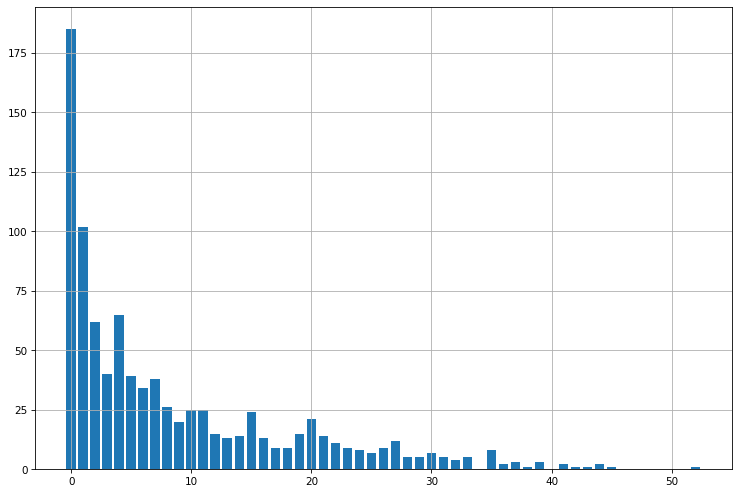

In [32]:
all_situations_df = df[df["situation"]==situation]
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Goals")

In the previous chart, the mode was 0 goals, largely due to players with limited ice time. 

To focus on meaningful performance, this chart includes only skaters who played a minimum number of games.

Mean: 11.19
Variance: 99.17
Standard deviation: 9.95
Mode: 4.0


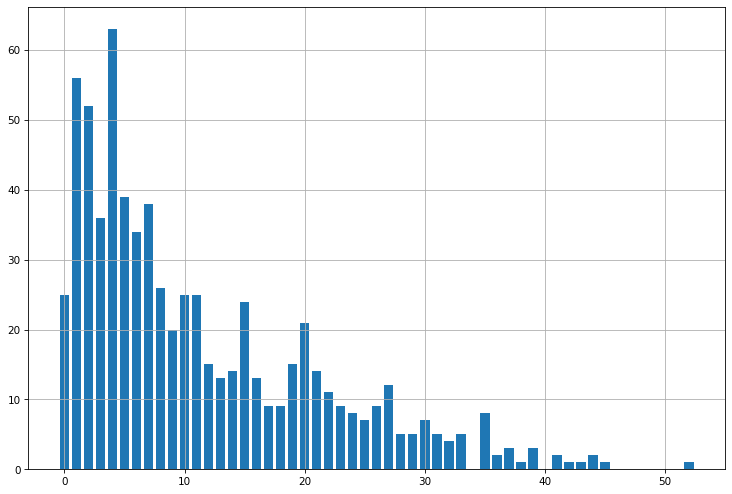

In [33]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
distributions_utils.plot_ftab(all_situations_df, feature, xlabel="Goals")

Cohen's effect size: 1.15


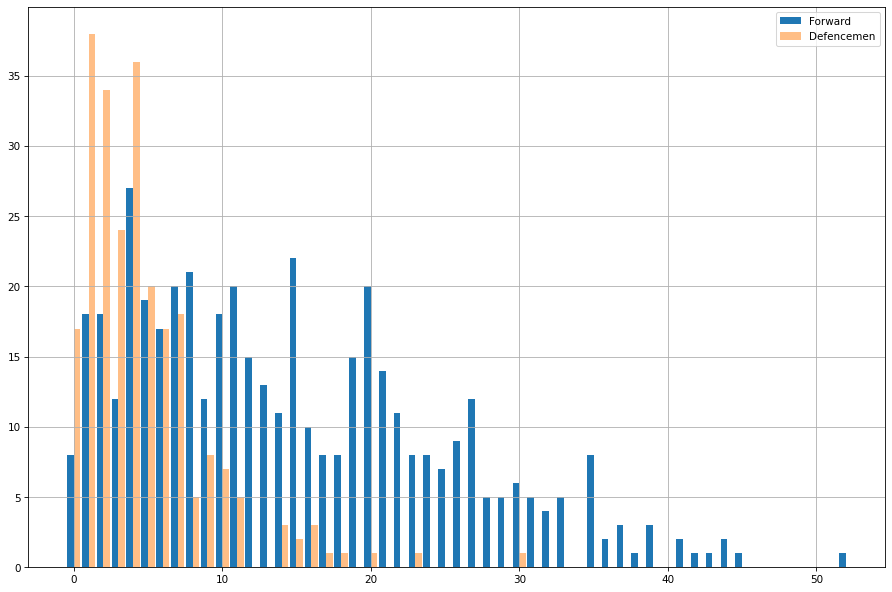

In [34]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

distributions_utils.plot_two_ftabs(df1, df2, feature, name1="Forward", name2="Defencemen")

## Step 6: Probability Mass Function

Actual PMF: 
Mean: 11.19
Variance: 99.03
Standard deviation: 9.95
Mode: 4.0
Skewness: 1.13

Observed PMF: 
Mean: 20.04
Variance: 120.32
Standard deviation: 10.97
Mode: 20.0
Skewness: 0.37


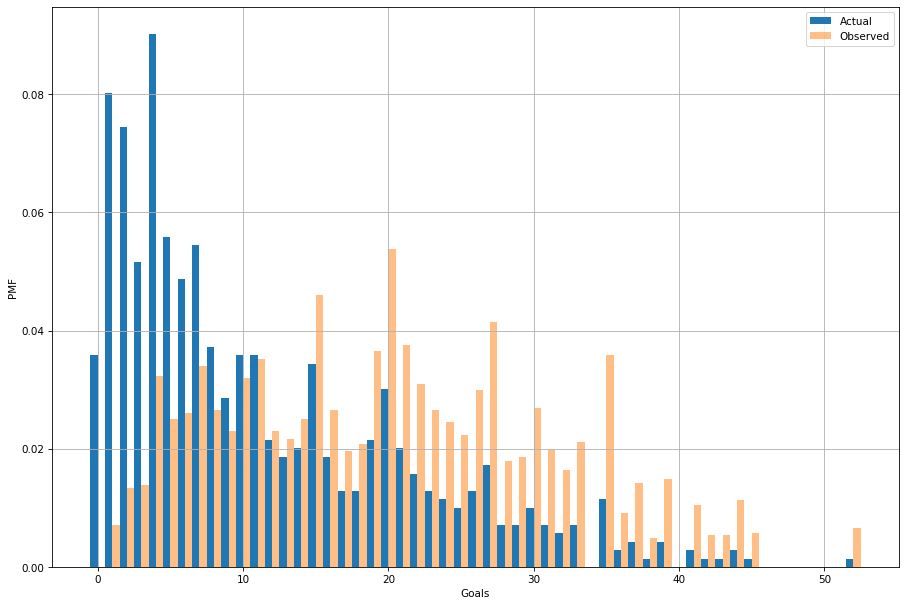

In [42]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
pmf_utils.plot_pmf(all_situations_df, feature, xlabel="Goals", width=0.5)

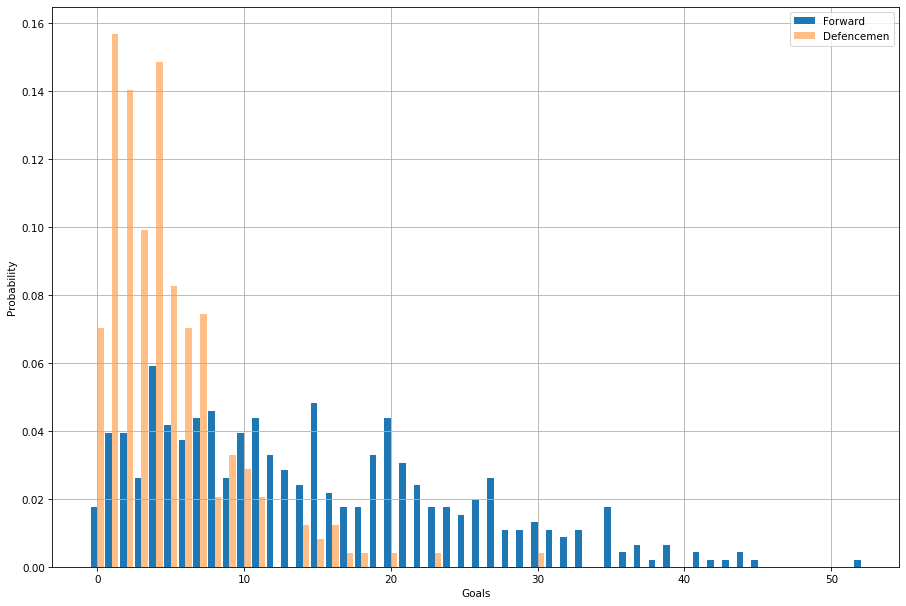

In [36]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

pmf_utils.plot_two_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Goals")

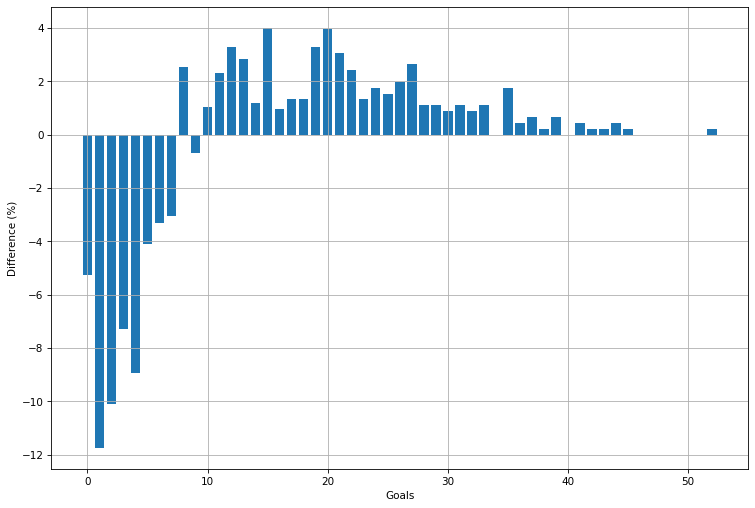

In [37]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
df1 = all_situations_df[all_situations_df["position"]!="D"]
df2 = all_situations_df[all_situations_df["position"]=="D"]

pmf_utils.plot_diff_pmfs(df1, df2, feature, name1="Forward", name2="Defencemen", xlabel="Goals")

## Step 7: Percentile Ranks and Cumulative Distribution Function

Reference player: **Auston Matthews**.

Auston Matthews - Percentile rank: 96.42
Median: 8.00
Interquartile range: 13.00
Quartile skewness: 0.38


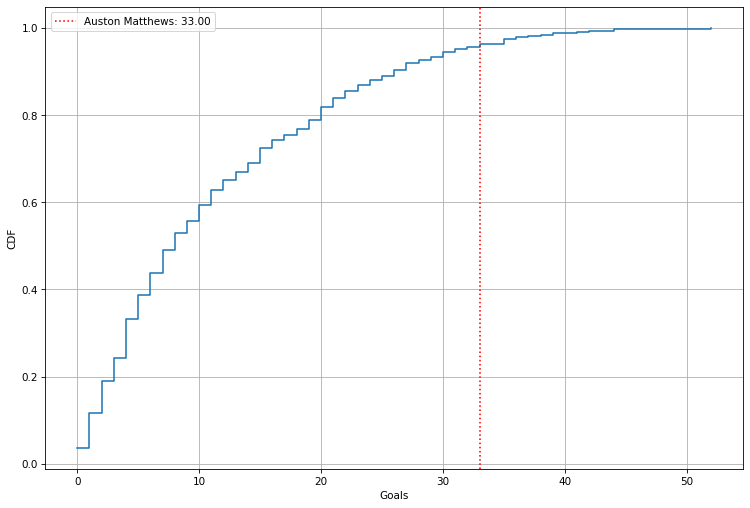

In [38]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals = all_situations_df[feature].values
ref = all_situations_df[all_situations_df["name"]==name_player][feature].values[0]

cdf_utils.percentile_rank(ref, vals, label=name_player)
cdf_utils.plot_cdf(ref, vals, label=name_player, xlabel="Goals")

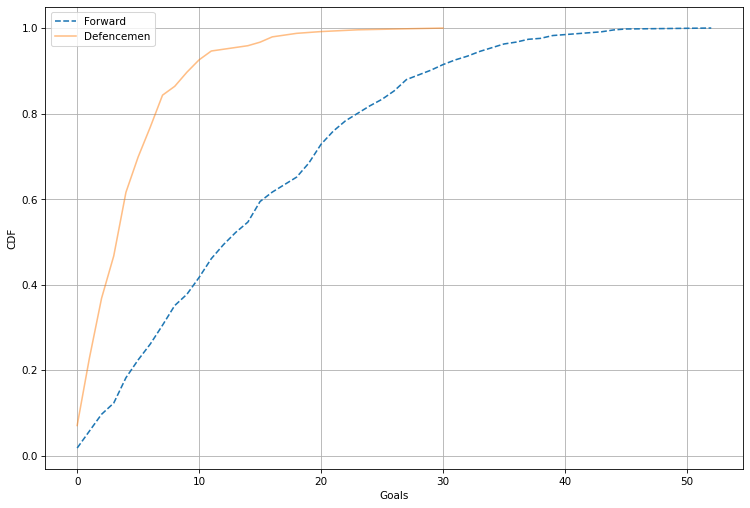

In [39]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]
vals1 = all_situations_df[all_situations_df["position"]!="D"][feature].values
vals2 = all_situations_df[all_situations_df["position"]=="D"][feature].values

cdf_utils.plot_two_cdfs(vals1, vals2, name1="Forward", name2="Defencemen", xlabel="Goals")

## Step 8: Modeling Distributions

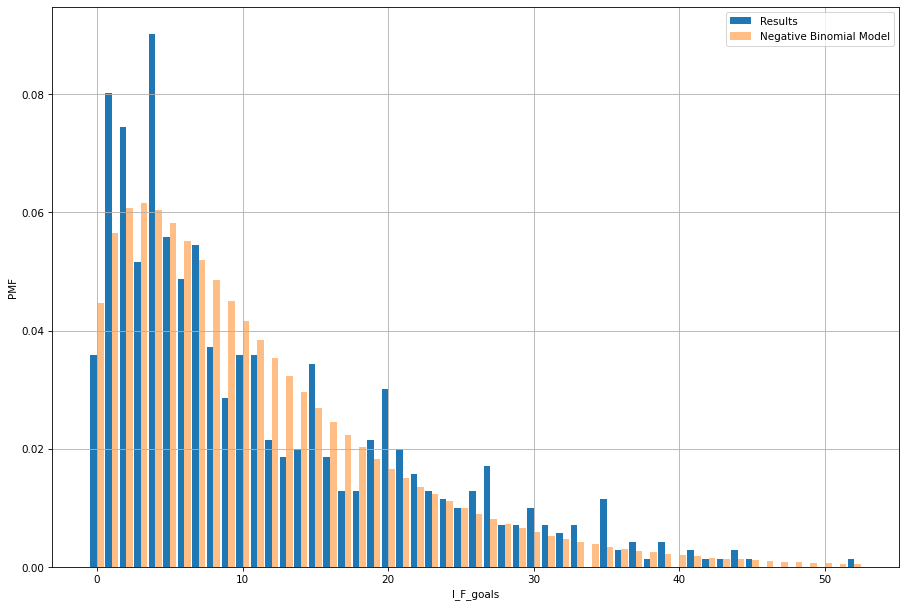

In [40]:
all_situations_df = df[(df["situation"] == situation) & (df["games_played"] >= min_games_played)]

top_score = int(all_situations_df[feature].max())

modeling_distributions_utils.plot_negative_binomial(
    all_situations_df, 
    feature, 
    range(top_score+1),
    xlabel=feature)

## Step 9: Probability Density Function and Kernel Density Estimate